In [26]:
## load the libraries 
import sys
import warnings
import os
import glob
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split

from keras.layers import *
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.models import Model, Sequential
from keras.metrics import *
from keras.optimizers import Adam, RMSprop
from scipy.stats import norm
from keras.preprocessing import image
from keras import datasets

from keras import backend as K
import random
import matplotlib.pyplot as plt
plt.gray()



<Figure size 432x288 with 0 Axes>

In [27]:
def load_image(path):
    x_size = 28
    y_size = 28
    image_list = np.zeros((len(path), x_size, y_size, 1))
    for i, fig in enumerate(path):
        img = image.load_img(fig, color_mode='grayscale', target_size=(x_size, y_size))
        x = image.img_to_array(img).astype('float32')
        x = x / 255.0
        image_list[i] = x
    
    return image_list

In [28]:
"""
train_img = glob.glob("/home/webvalley/Documents/plaque-image-preprocessing/Data/Patches/Plaque/Aug/cal/*.png")
train_img += glob.glob("/home/webvalley/Documents/plaque-image-preprocessing/Data/Patches/Plaque/Aug/fibrous/*.png")
train_img += random.sample(glob.glob("/home/webvalley/Documents/plaque-image-preprocessing/Data/Patches/NoPlaque/*.png"), 3790)
"""
train_img = glob.glob("train/*.png")

test_img = glob.glob("test/*.png")


random.shuffle(train_img)
random.shuffle(test_img)

x_train = load_image(train_img)


x_test = load_image(test_img) 

In [29]:
"""
imgs = glob.glob("/home/webvalley/Documents/plaque-image-preprocessing/AutoEncoder/test/*.png")
print(imgs[len(imgs)-1])


for _ in range(200):
    r = random.randint(0, len(imgs)-1)
    name = imgs[r].split("/")[-1]
    while not "noplaque" in name:
        r = random.randint(0, len(imgs))
        name = imgs[r].split("/")[-1]
    
    print('mv "' + imgs[r] + '" /home/webvalley/Documents/plaque-image-preprocessing/AutoEncoder/train')

    os.system('mv "' + imgs[r] + '" /home/webvalley/Documents/plaque-image-preprocessing/AutoEncoder/train')


for im in glob.glob("/home/webvalley/Documents/plaque-image-preprocessing/Data/Patches/Plaque/Aug/cal/*.png"):
    #print(im)
    os.system(f"cp {im} train")
"""

'\nimgs = glob.glob("/home/webvalley/Documents/plaque-image-preprocessing/AutoEncoder/test/*.png")\nprint(imgs[len(imgs)-1])\n\n\nfor _ in range(200):\n    r = random.randint(0, len(imgs)-1)\n    name = imgs[r].split("/")[-1]\n    while not "noplaque" in name:\n        r = random.randint(0, len(imgs))\n        name = imgs[r].split("/")[-1]\n    \n    print(\'mv "\' + imgs[r] + \'" /home/webvalley/Documents/plaque-image-preprocessing/AutoEncoder/train\')\n\n    os.system(\'mv "\' + imgs[r] + \'" /home/webvalley/Documents/plaque-image-preprocessing/AutoEncoder/train\')\n\n\nfor im in glob.glob("/home/webvalley/Documents/plaque-image-preprocessing/Data/Patches/Plaque/Aug/cal/*.png"):\n    #print(im)\n    os.system(f"cp {im} train")\n'

In [30]:
y_test = []

for img in test_img:
    if "Calcific" in img:
        y_test.append(0)
    elif "Fibrous" in img:
        y_test.append(1)
    elif "noplaque" in img:
        y_test.append(2)

3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3


In [31]:
batch_size = 128
epochs = 20
inChannel = 1
x, y = 28, 28
input_img = Input(shape = (x, y, inChannel))
print(input_img.shape)

(?, 28, 28, 1)


In [32]:
# input layer
input_layer = Input(shape=(x, y, inChannel))

# encoding architecture
encoded_layer1 = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
encoded_layer1 = MaxPool2D( (2, 2), padding='same')(encoded_layer1)
encoded_layer2 = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded_layer1)
encoded_layer2 = MaxPool2D( (2, 2), padding='same')(encoded_layer2)
encoded_layer3 = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded_layer2)
latent_view    = MaxPool2D( (2, 2), padding='same')(encoded_layer3)

In [33]:
# decoding architecture
decoded_layer1 = Conv2D(16, (3, 3), activation='relu', padding='same')(latent_view)
decoded_layer1 = UpSampling2D((2, 2))(decoded_layer1)
decoded_layer2 = Conv2D(32, (3, 3), activation='relu', padding='same')(decoded_layer1)
decoded_layer2 = UpSampling2D((2, 2))(decoded_layer2)
decoded_layer3 = Conv2D(64, (3, 3), activation='relu')(decoded_layer2)
decoded_layer3 = UpSampling2D((2, 2))(decoded_layer3)
output_layer   = Conv2D(1, (3, 3), padding='same')(decoded_layer3)

In [34]:
# compile the model
model = Model(input_layer, output_layer)
model.compile(optimizer='adam', loss='mse')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 16)          4624      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 16)          0         
__________

In [35]:
#early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=5, mode='auto')
history = model.fit(x_train, x_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, x_test))#, callbacks=[early_stopping])

Train on 6981 samples, validate on 599 samples
Epoch 1/20
6981/6981 [==============================] - 19s 3ms/step - loss: 0.0086 - val_loss: 0.0039
Epoch 2/20
6981/6981 [==============================] - 19s 3ms/step - loss: 0.0034 - val_loss: 0.0028
Epoch 3/20
6981/6981 [==============================] - 20s 3ms/step - loss: 0.0027 - val_loss: 0.0025
Epoch 4/20
6981/6981 [==============================] - 19s 3ms/step - loss: 0.0025 - val_loss: 0.0024
Epoch 5/20
6981/6981 [==============================] - 19s 3ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 6/20
6981/6981 [==============================] - 19s 3ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 7/20
6981/6981 [==============================] - 19s 3ms/step - loss: 0.0022 - val_loss: 0.0021
Epoch 8/20
6981/6981 [==============================] - 19s 3ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 9/20
6981/6981 [==============================] - 19s 3ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 10/20
6981/6981 [===

In [36]:
# compile the model
encoder = Model(input_layer, latent_view)
encoder.compile(optimizer='adam', loss='mse')

In [37]:

encoded_imgs = encoder.predict(x_test)
decoded_imgs = model.predict(x_test)

In [38]:
encoded_imgs[88, :, :, 15]
print(encoded_imgs[0].shape)

(4, 4, 16)


In [39]:
label_conv = {
    0: 'Calcific',
    1: 'Fibrous',
    2: 'NoPlaque'
}

Encoded 0  Label NoPlaque


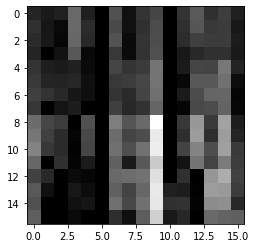

Encoded 1  Label NoPlaque


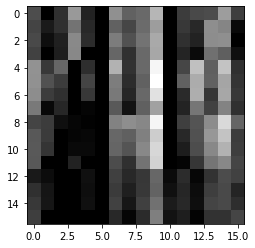

Encoded 2  Label Fibrous


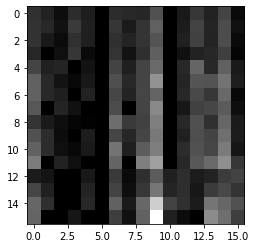

Encoded 3  Label NoPlaque


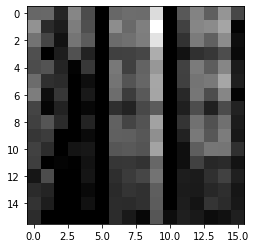

Encoded 4  Label Calcific


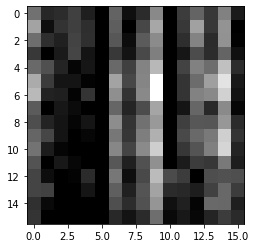

Encoded 5  Label NoPlaque


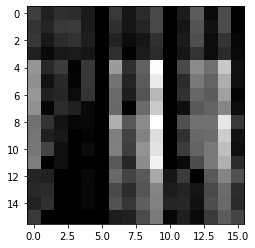

Encoded 6  Label NoPlaque


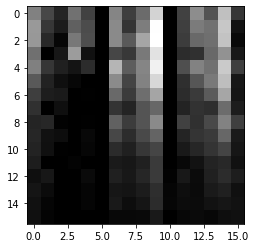

Encoded 7  Label NoPlaque


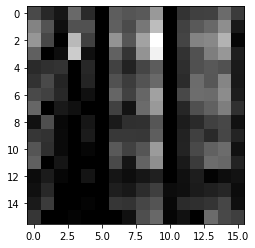

Encoded 8  Label NoPlaque


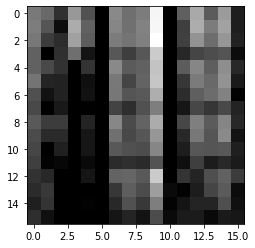

Encoded 9  Label Fibrous


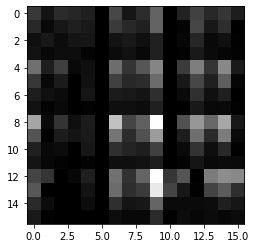

Encoded 10  Label NoPlaque


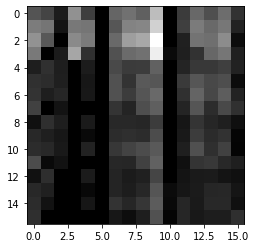

In [64]:

for i in range(11):
    print("Encoded", i, " Label", label_conv[y_test[i]])

    plt.imshow(encoded_imgs[i].reshape((16, 16)))
    plt.show()

In [66]:
len(encoded_imgs)

599

In [112]:
decoded_imgs = model.predict(x_test)

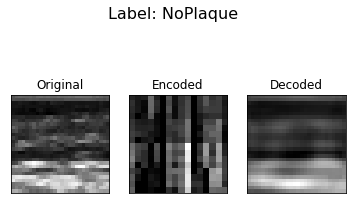

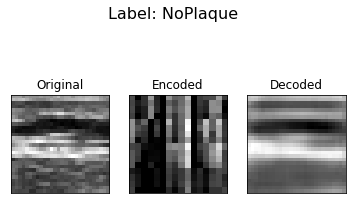

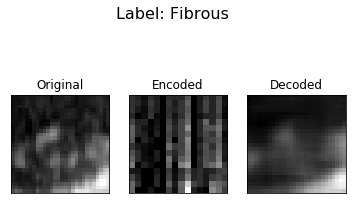

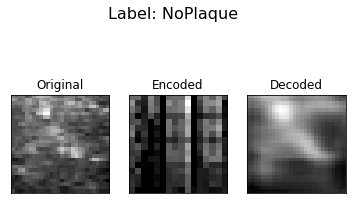

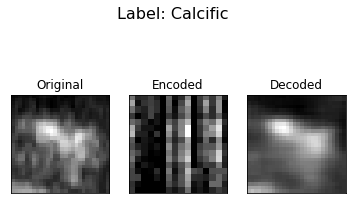

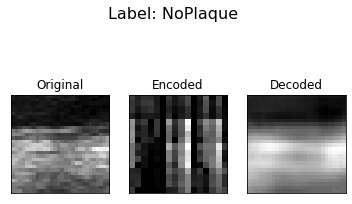

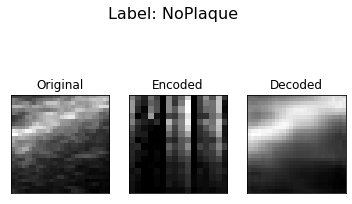

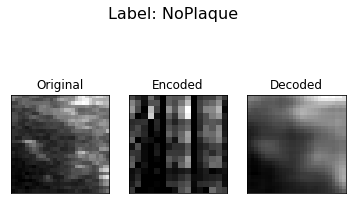

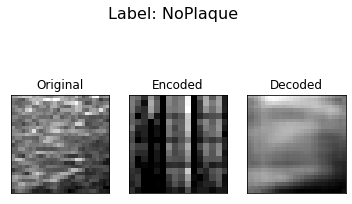

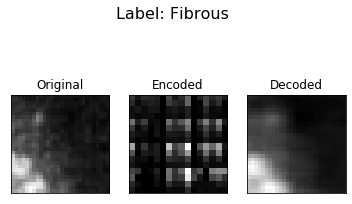

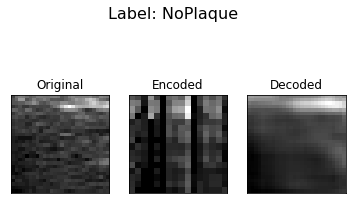

In [136]:

for i in range(11):
    fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3)
    
    fig.suptitle("Label: " + label_conv[y_test[i]], fontsize=16)
    
    ax1.imshow(x_test[i].reshape((28, 28)))
    ax1.set_title("Original")
    
    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)
    
    ax2.imshow(encoded_imgs[i].reshape((16, 16)))
    ax2.set_title("Encoded")
    
    ax2.get_xaxis().set_visible(False)
    ax2.get_yaxis().set_visible(False)
    
    ax3.imshow(decoded_imgs[i].reshape((28, 28)))
    ax3.set_title("Decoded")
    
    ax3.get_xaxis().set_visible(False)
    ax3.get_yaxis().set_visible(False)
    plt.show()

Encoded 0  Label NoPlaque


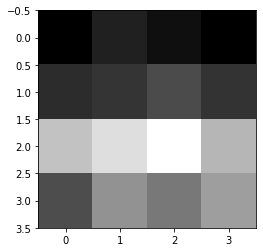

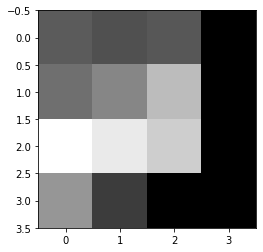

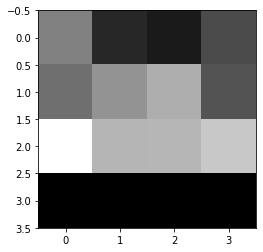

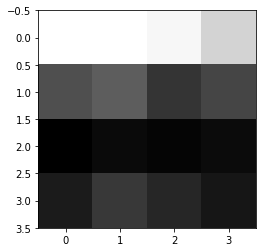

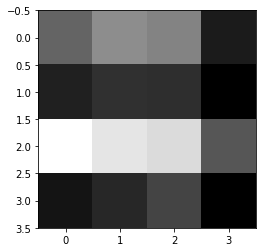

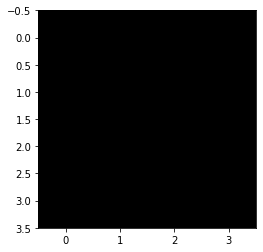

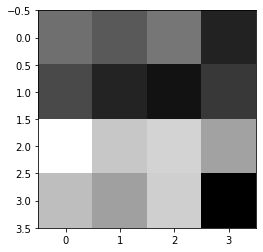

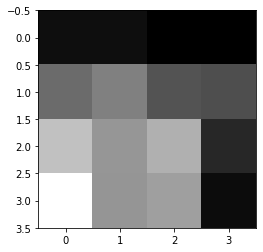

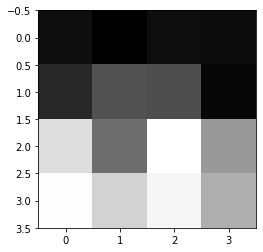

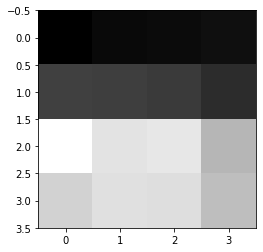

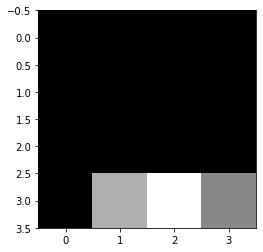

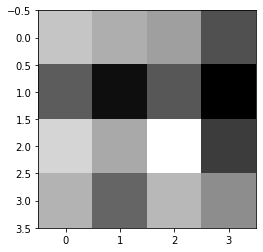

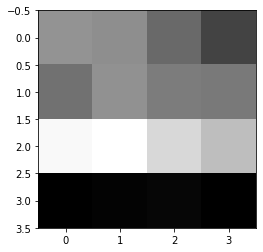

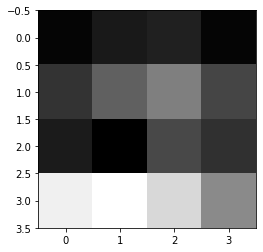

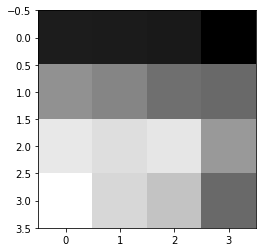

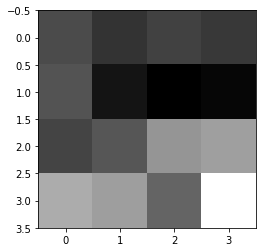

Encoded 1  Label NoPlaque


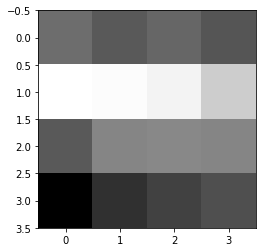

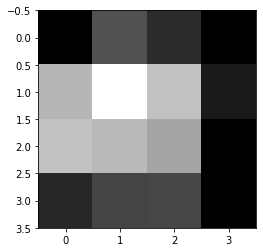

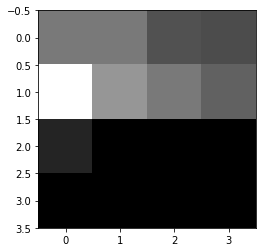

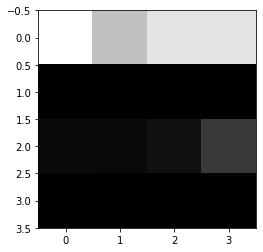

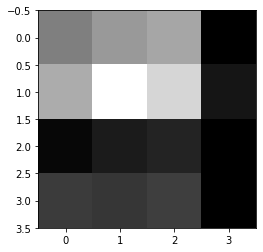

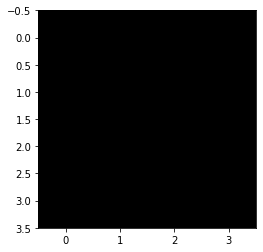

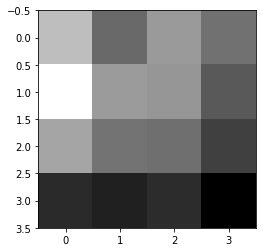

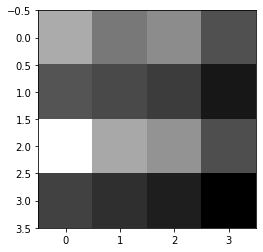

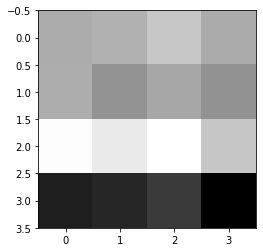

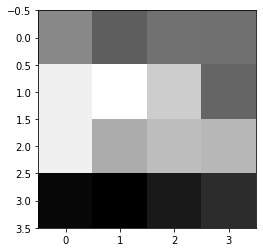

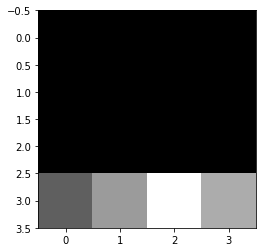

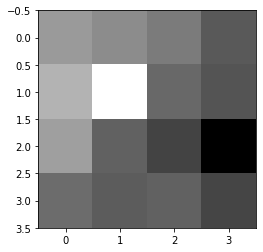

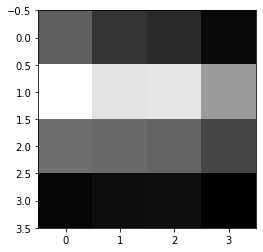

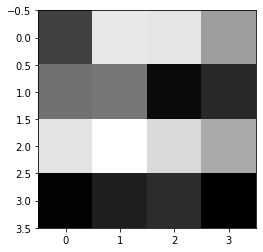

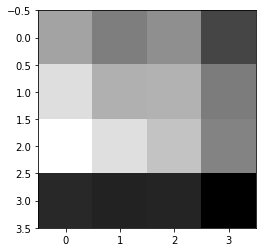

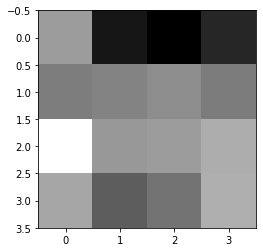

In [41]:

for i in range(2):
    print("Encoded", i, " Label", label_conv[y_test[i]])
    for j in range(16):
        plt.imshow(encoded_imgs[i, ..., j])
        plt.show()

In [62]:
from sklearn.metrics.pairwise import cosine_similarity

cos_sim = cosine_similarity(encoded_imgs[10].reshape(1,-1), encoded_imgs[9].reshape(1,-1))

In [63]:
cos_sim

array([[0.58319676]], dtype=float32)

In [139]:
encoded_imgs.shape

(599, 4, 4, 16)

In [146]:

from sklearn.decomposition import PCA
pca = PCA(2)
proj = pca.fit_transform(encoded_imgs[0].reshape(16,16))


In [142]:
pca.components_

array([[-0.2549235 , -0.09087127, -0.03511506,  0.3373262 , -0.08611946,
        -0.        , -0.17057987, -0.23710804, -0.2281992 , -0.6840637 ,
        -0.05276056, -0.06513603, -0.03621673, -0.1740841 , -0.3793199 ,
        -0.12827624],
       [ 0.12809584,  0.2167996 ,  0.24984434,  0.00164238,  0.30122557,
        -0.        ,  0.10703238, -0.00325264, -0.07803896, -0.03409711,
        -0.14226146,  0.0555993 ,  0.7389564 , -0.41889352,  0.01361216,
        -0.1402329 ]], dtype=float32)

In [143]:
pca.explained_variance_

array([0.03788387, 0.01734169], dtype=float32)

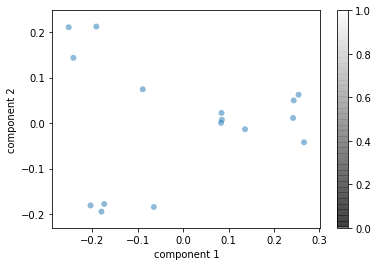

In [144]:
plt.scatter(proj[:, 0], proj[:, 1],
             edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();